In [5]:
import numpy as np
import matplotlib.pyplot as plt
# Create a custom legend (optional)
import matplotlib.patches as mpatches

In [ ]:
def implied_correlation(sigma_i, sigma_1, beta, w1):
    """Calculates the implied correlation."""
    sigma_2 = beta * sigma_1
    numerator = sigma_i**2 - w1 * sigma_1**2 - (1 - w1) * sigma_2**2
    denominator = 2 * w1 * (1 - w1) * beta * sigma_1**2
    return numerator / denominator

0.15000000000000002


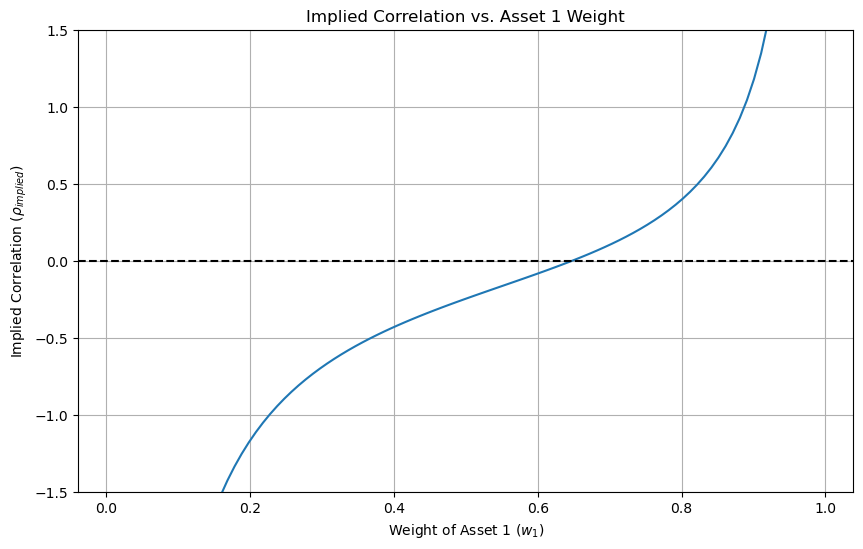

In [26]:
# Define parameters
sigma_i = 0.12
sigma_1 = 0.10
beta = 1.5
print(beta*sigma_1)

# Generate weights
w1_values = np.linspace(0.01, 0.99, 100) #avoiding 0 and 1, to prevent division by zero.

# Calculate implied correlations
rho_values = [implied_correlation(sigma_i, sigma_1, beta, w) for w in w1_values]

# Plot the curve
plt.figure(figsize=(10, 6))
plt.plot(w1_values, rho_values)
plt.xlabel("Weight of Asset 1 ($w_1$)")
plt.ylabel("Implied Correlation ($ρ_{implied}$)")
plt.ylim((-1.5,1.5))
plt.title("Implied Correlation vs. Asset 1 Weight")
plt.grid(True)

plt.axhline(y=0, color='black', linestyle='--') 

plt.show()

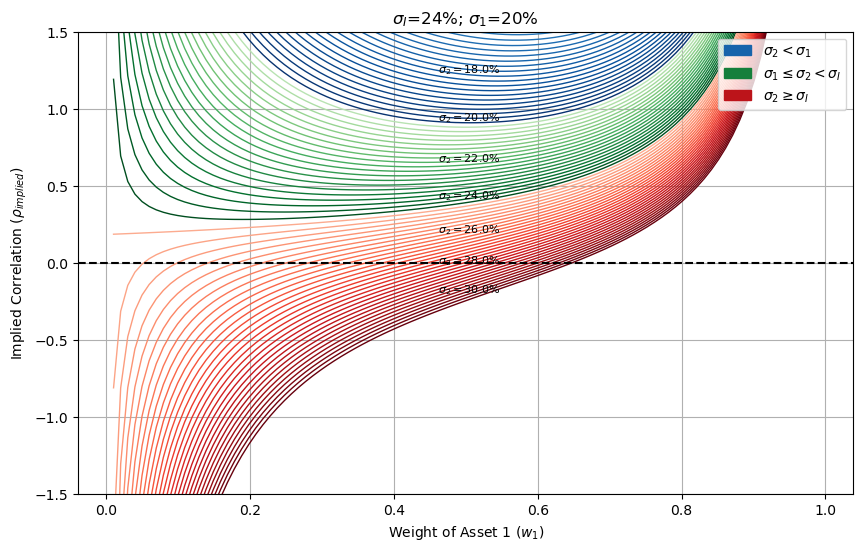

In [36]:
sigma_i = 0.24  # Portfolio volatility
sigma_1 = 0.20  # Volatility of asset 1

# Generate weights
w1_values = np.linspace(0.01, 0.99, 100)

# Beta values to plot
beta_values = np.linspace(0.5, 1.5, 101)  # Adjusted range for better visualization

# Plot the curves
plt.figure(figsize=(10, 6))

# Create colormaps
cmap_lower = plt.get_cmap('Blues')  # For sigma_1 * beta < sigma_1
cmap_middle = plt.get_cmap('Greens') # For sigma_1 < sigma_1 * beta < sigma_i
cmap_upper = plt.get_cmap('Reds')  # For sigma_1 * beta > sigma_i

for i, beta in enumerate(beta_values):
    rho_values = [implied_correlation(sigma_i, sigma_1, beta, w) for w in w1_values]

    sigma_2 = sigma_1 * beta

    if sigma_2 < sigma_1:
        normalized_beta = (beta - min(beta_values)) / (1 - min(beta_values))
        color = cmap_lower(0.3 + 0.7 * normalized_beta)  # Start at 30% opacity
    elif sigma_1 <= sigma_2 < sigma_i:
        normalized_beta = (sigma_2 - sigma_1) / (sigma_i - sigma_1)
        color = cmap_middle(0.3 + 0.7 * normalized_beta)  # Start at 30% opacity
    else:
        normalized_beta = (sigma_2 - sigma_i) / (sigma_1 * max(beta_values) - sigma_i)
        color = cmap_upper(0.3 + 0.7 * normalized_beta)  # Start at 30% opacity

    plt.plot(w1_values, rho_values, color=color, linewidth=1)

    # Add beta labels every 10 betas
    if i % 10 == 0:
        # Find the middle w1 value for label placement
        middle_w1_index = len(w1_values) // 2
        middle_rho = rho_values[middle_w1_index]
        plt.annotate(f"$\sigma_2 = ${beta*sigma_1*100:.1f}%", (w1_values[middle_w1_index], middle_rho),
                     textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)

plt.xlabel("Weight of Asset 1 ($w_1$)")
plt.ylabel(r"Implied Correlation ($\rho_{implied}$)")
plt.title(f"$\sigma_I$={sigma_i*100:.0f}%; $\sigma_1$={sigma_1*100:.0f}%")
plt.grid(True)
plt.axhline(y=0, color='black', linestyle='--')
plt.ylim((-1.5, 1.5))

# Create a custom legend (optional)
blue_patch = mpatches.Patch(color=cmap_lower(0.8), label=r'$\sigma_2 < \sigma_1$')
green_patch = mpatches.Patch(color=cmap_middle(0.8), label=r'$\sigma_1 \leq \sigma_2 < \sigma_I$')
red_patch = mpatches.Patch(color=cmap_upper(0.8), label=r'$\sigma_2 \geq \sigma_I$')
plt.legend(handles=[blue_patch, green_patch, red_patch], loc='upper right')

plt.show()

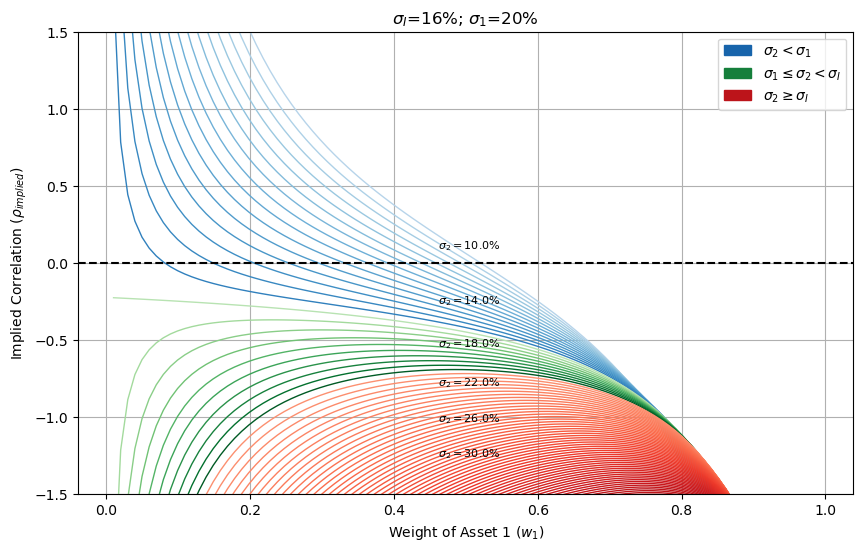

In [ ]:
sigma_i = 0.16  # Portfolio volatility
sigma_1 = 0.20  # Volatility of asset 1

# Generate weights
w1_values = np.linspace(0.01, 0.99, 100)

# Beta values to plot
beta_values = np.linspace(0.5, 2.5, 101)  # Adjusted range for better visualization

# Plot the curves
plt.figure(figsize=(10, 6))

# Create colormaps
cmap_lower = plt.get_cmap('Blues')  # For sigma_1 * beta < sigma_1
cmap_middle = plt.get_cmap('Greens') # For sigma_1 < sigma_1 * beta < sigma_i
cmap_upper = plt.get_cmap('Reds')  # For sigma_1 * beta > sigma_i

for i, beta in enumerate(beta_values):
    rho_values = [implied_correlation(sigma_i, sigma_1, beta, w) for w in w1_values]

    sigma_2 = sigma_1 * beta

    if sigma_2 < sigma_i:
        normalized_beta = (beta - min(beta_values)) / (1 - min(beta_values))
        color = cmap_lower(0.3 + 0.7 * normalized_beta)  # Start at 30% opacity
    elif sigma_i <= sigma_2 < sigma_1:
        normalized_beta = (sigma_2 - sigma_i) / (sigma_1 - sigma_i)
        color = cmap_middle(0.3 + 0.7 * normalized_beta)  # Start at 30% opacity
    else:
        normalized_beta = (sigma_2 - sigma_i) / (sigma_1 * max(beta_values) - sigma_i)
        color = cmap_upper(0.3 + 0.7 * normalized_beta)  # Start at 30% opacity

    plt.plot(w1_values, rho_values, color=color, linewidth=1)

    # Add beta labels every 10 betas
    if i % 10 == 0:
        # Find the middle w1 value for label placement
        middle_w1_index = len(w1_values) // 2
        middle_rho = rho_values[middle_w1_index]
        plt.annotate(f"$\sigma_2 = ${beta*sigma_1*100:.1f}%", (w1_values[middle_w1_index], middle_rho),
                     textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)

plt.xlabel("Weight of Asset 1 ($w_1$)")
plt.ylabel(r"Implied Correlation ($\rho_{implied}$)")
plt.title(f"$\sigma_I$={sigma_i*100:.0f}%; $\sigma_1$={sigma_1*100:.0f}%")
plt.grid(True)
plt.axhline(y=0, color='black', linestyle='--')
plt.ylim((-1.5, 1.5))

# Create a custom legend
blue_patch = mpatches.Patch(color=cmap_lower(0.8), label=r'$\sigma_2 < \sigma_1$')
green_patch = mpatches.Patch(color=cmap_middle(0.8), label=r'$\sigma_1 \leq \sigma_2 < \sigma_I$')
red_patch = mpatches.Patch(color=cmap_upper(0.8), label=r'$\sigma_2 \geq \sigma_I$')
plt.legend(handles=[blue_patch, green_patch, red_patch], loc='upper right')

plt.show()

In [37]:
def implied_correlation_n_dim(sigma_index: float ,sigmas: np.array, weights: np.array):
    if not isinstance(sigmas, np.ndarray):
        sigmas = np.array(sigmas)
    if not isinstance(weights, np.ndarray):
        weights = np.array(weights)

    assert isinstance(sigmas, np.ndarray), "sigmas must be a NumPy array"
    assert isinstance(weights, np.ndarray), "weights must be a NumPy array"

    numerator = sigma_index**2 - np.sum(sigmas**2 * weights)
    
    n = len(sigmas)
    i, j = np.meshgrid(np.arange(n), np.arange(n))

    # Calculate the pairwise products using vectorized operations
    pairwise_products = sigmas[i] * sigmas[j] * weights[i] * weights[j]

    # print(pairwise_products)
    denominator = np.sum(pairwise_products[i != j])
    # print(denominator)

    return numerator / denominator

In [133]:
def generate_sample(n_assets: int, sigma_min: float = 0.10, sigma_max: float = 0.40):
    random_weights = np.random.rand(n_assets)
    weights = random_weights / np.sum(random_weights)

    sigmas = np.random.uniform(sigma_min, sigma_max, n_assets)

    return weights, sigmas

# Example usage
n_assets = 5
sigma_index = 0.20
weights, sigmas = generate_sample(n_assets, sigma_index)

implied_rho = implied_correlation_n_dim(sigma_index, sigmas, weights)

print("Weights:", weights)
print("Sigmas:", sigmas)
print("Implied Correlation:", implied_rho)

Weights: [0.36605018 0.02714758 0.17882121 0.12161377 0.30636726]
Sigmas: [0.23448318 0.37575511 0.28806443 0.29791323 0.33847874]
Implied Correlation: -0.7393027763193363


In [148]:
def generate_sample_skewed(n_assets: int, target_mean: float = 0.20, sigma_min: float = 0.05, sigma_max: float = 0.70):
    """Generates a random sample of weights and sigmas with skewed distributions,
    with a target mean for sigmas."""

    # Generate skewed weights (concentrated towards some assets)
    alpha = np.ones(n_assets) * 0.5  # Adjust alpha for desired skewness
    random_weights = np.random.dirichlet(alpha)

    # Generate skewed sigmas with a target mean
    shape = 2.0  # Adjust shape for desired skewness
    scale = target_mean / shape  # Calculate scale to achieve target mean
    sigmas = np.random.gamma(shape, scale, n_assets)
    sigmas = np.clip(sigmas, sigma_min, sigma_max)

    return random_weights, sigmas

array([77.19978973])

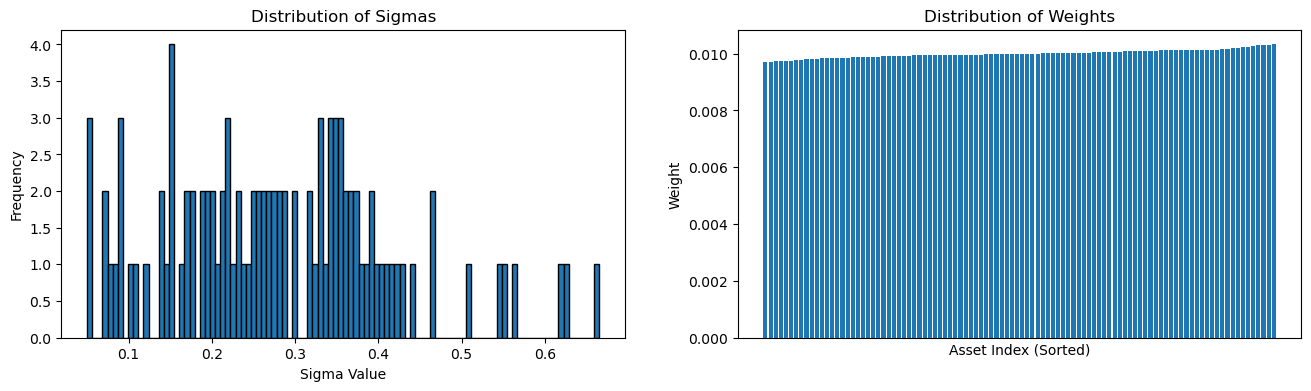

In [383]:
def generate_sample_skewed(n_assets: int, target_mean: float = 0.20, 
                           sigma_min: float = 0.05, sigma_max: float = 0.70,
                           alpha_scale: float = 1.0, gamma_shape: float = 4.0):
    """Generates a random sample of weights and sigmas with skewed distributions,
    with a target mean for sigmas and control over weight concentration."""

    # Generate skewed weights (concentrated towards some assets)
    alpha = np.ones(n_assets) * 0.5 * alpha_scale  # Adjust alpha for desired skewness
    random_weights = np.random.dirichlet(alpha)

    # Generate skewed sigmas with a target mean
    # shape = np.random.random(1) * 5 + 2
    shape = gamma_shape
    scale = target_mean / shape
    sigmas = np.random.gamma(shape, scale, n_assets)
    sigmas = np.clip(sigmas, sigma_min, sigma_max)

    return random_weights, sigmas

n_assets = 100
target_mean = 0.28
sigma_min = 0.05
sigma_max = 0.70

weights, sigmas = generate_sample_skewed(n_assets, target_mean, sigma_min, sigma_max, alpha_scale=10000)

# Create subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 4))  # 1 row, 2 columns

# Plot the distribution of sigmas
axes[0].hist(sigmas, bins=100, edgecolor='black')
axes[0].set_xlabel("Sigma Value")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Distribution of Sigmas")

# Plot the distribution of weights
weights.sort()
axes[1].bar(range(len(weights)), weights)
axes[1].set_xlabel("Asset Index (Sorted)")
axes[1].set_ylabel("Weight")
axes[1].set_title("Distribution of Weights")
axes[1].set_xticks([])  # Remove x-axis ticks

plt.show()

In [350]:
sigma_index = 0.25

n_assets = 100
target_mean = 0.20
sigma_min = 0.05
sigma_max = 0.70

weights, sigmas = generate_sample_skewed(n_assets, target_mean, sigma_min, sigma_max)

implied_rho = implied_correlation_n_dim(sigma_index, sigmas, weights)

# print("Weights:", weights)
# print("Sigmas:", sigmas)
print("Implied Correlation:", implied_rho)

Implied Correlation: 0.4433348172222237


In [ ]:
n_assets = 100
target_mean = 0.20
sigma_min = 0.05
sigma_max = 0.70
sigma_index = 0.28

# alpha - modify the distribution of volatilityS
alpha_scales = [0.1, 0.25, 0.5, 0.75, 1.0, 5.0, 10.0, 25.0, 50.0, 100.0, 250.0, 500.0, 1000.0, 2500.0, 5000.0]
n_simulations = 1000

implied_correlations: dict[list] = {}  # Use a dictionary to store results

for alpha_scale in alpha_scales:
    implied_correlations[alpha_scale] = [] # Initialize list for each alpha_scale
    for _ in range(n_simulations):
        weights, sigmas = generate_sample_skewed(n_assets, target_mean, sigma_min, sigma_max, alpha_scale)
        implied_rho = implied_correlation_n_dim(sigma_index, sigmas, weights)
        implied_correlations[alpha_scale].append(implied_rho)

for alpha_scale, rho_values in implied_correlations.items():
    print(f"Alpha Scale: {alpha_scale} | Implied Correlation Mean: {np.mean(rho_values):.4f}, Std: {np.std(rho_values):.4f}")

Alpha Scale: 0.1 | Implied Correlation Mean: 1.3384, Std: 1.2422
Alpha Scale: 0.25 | Implied Correlation Mean: 0.8957, Std: 0.6579
Alpha Scale: 0.5 | Implied Correlation Mean: 0.8387, Std: 0.4589
Alpha Scale: 0.75 | Implied Correlation Mean: 0.7861, Std: 0.3895
Alpha Scale: 1.0 | Implied Correlation Mean: 0.7814, Std: 0.3444
Alpha Scale: 5.0 | Implied Correlation Mean: 0.7476, Std: 0.2409
Alpha Scale: 10.0 | Implied Correlation Mean: 0.7399, Std: 0.2144
Alpha Scale: 25.0 | Implied Correlation Mean: 0.7394, Std: 0.2168
Alpha Scale: 50.0 | Implied Correlation Mean: 0.7361, Std: 0.2112
Alpha Scale: 100.0 | Implied Correlation Mean: 0.7352, Std: 0.2102
Alpha Scale: 250.0 | Implied Correlation Mean: 0.7417, Std: 0.2034
Alpha Scale: 500.0 | Implied Correlation Mean: 0.7330, Std: 0.2006
Alpha Scale: 1000.0 | Implied Correlation Mean: 0.7338, Std: 0.1987
Alpha Scale: 2500.0 | Implied Correlation Mean: 0.7354, Std: 0.2028
Alpha Scale: 5000.0 | Implied Correlation Mean: 0.7372, Std: 0.2037


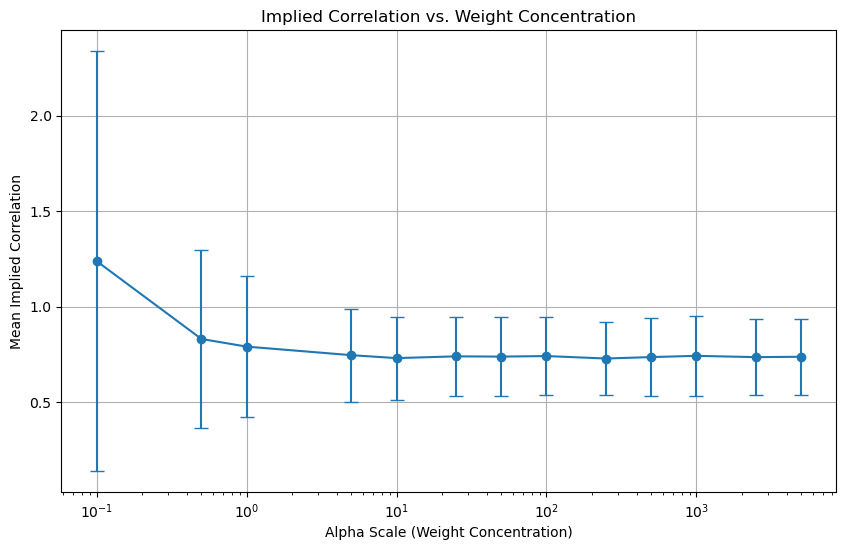

In [378]:
x_values = list(implied_correlations.keys())  # Alpha scales
y_values = [np.mean(rho_values) for rho_values in implied_correlations.values()]  # Mean implied correlations
y_err = [np.std(rho_values) for rho_values in implied_correlations.values()]  # Standard deviations

# Create the plot
plt.figure(figsize=(10, 6))
plt.errorbar(x_values, y_values, yerr=y_err, fmt='o-', capsize=5)
plt.xscale('log')  # Use logarithmic scale for x-axis
plt.xlabel("Alpha Scale (Weight Concentration)")
plt.ylabel("Mean Implied Correlation")
plt.title("Implied Correlation vs. Weight Concentration")
plt.grid(True)
plt.show()